# Map with country borders

*Hagen Radtke, 2020-06-29*

## Step 1: Installing packages

This requires the packages "marmap" and . We will install them first. Make sure you choose "R" as kernel, not "R basic".


In [1]:
install.packages("marmap")
install.packages("mapdata")
install.packages("ggmap")

Installing package into '/silos/conda_packages/radtke/miniconda3_4.8.2/OS_42.3/r_packages'
(as 'lib' is unspecified)
Installing package into '/silos/conda_packages/radtke/miniconda3_4.8.2/OS_42.3/r_packages'
(as 'lib' is unspecified)


ERROR: Error in install.package("ggmap"): could not find function "install.package"


## Step 2: Get Baltic Sea Bathymetry from NOAA database

We will first write a function that downloads the bathymetry and then call this function so we will get a Baltic Sea bathymetry

In [2]:
## function to collect and store bathymetry data: library("marmap")
setwd("/silos/notebook_collection/plots_and_maps/map_with_countries/")
library("marmap")
library("ggplot2")

# define a function to download bathymetry data
get.bathymetry <- function(lon1=4, lon2=30, lat1=53, lat2=67, bathy.breaks = 8){
  bathymetry <- getNOAA.bathy(lon1=lon1, lon2=lon2, lat1=lat1, lat2=lat2, resolution=1, keep=FALSE) # keep = TRUE saves downloaded data as csv-File
  
  fortyfied.bathy <- fortify(bathymetry) # make a df out of bathy so ggplot can fully use the data
  fortyfied.bathy <- subset(fortyfied.bathy, z <= 0) # limit to values below sea surface
  fortyfied.bathy$z <- -fortyfied.bathy$z # make depths positive values
  
  names(fortyfied.bathy) <- c("Longitude", "Latitude", "Depth_m")
  fortyfied.bathy$Depthsteps_m <- cut(fortyfied.bathy$Depth_m, breaks = bathy.breaks, dig.lab = 5) # generate depth intervals for contour plot
  ## 'cut()' returns intervals in unpleasant format. Thus, cumbersome renaming for nice legend:
  
  levels(fortyfied.bathy$Depthsteps_m) <- sub(",", " - ", levels(fortyfied.bathy$Depthsteps_m))
  levels(fortyfied.bathy$Depthsteps_m) <- sub("\\(", "", levels(fortyfied.bathy$Depthsteps_m))
  levels(fortyfied.bathy$Depthsteps_m) <- sub("\\]", "", levels(fortyfied.bathy$Depthsteps_m))
  levels(fortyfied.bathy$Depthsteps_m) <- sub("(.*) - Inf", "&gt;\\1", levels(fortyfied.bathy$Depthsteps_m))
  
  return(fortyfied.bathy)
}
baltic.bathy <- get.bathymetry(lon1 = 4, lon2 = 30,
                                  lat1 = 53, lat2 = 67,
                                  bathy.breaks = c(seq(0, 50, length.out = 6),
                                                   seq(100, 300, length.out = 3),
                                                   +Inf))

Registered S3 methods overwritten by 'adehabitatMA':
  method                       from
  print.SpatialPixelsDataFrame sp  
  print.SpatialPixels          sp  
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'marmap'

The following object is masked from 'package:grDevices':

    as.raster

Querying NOAA database ...
This may take seconds to minutes, depending on grid size
Building bathy matrix ...


Let us see how baltic.bathy looks like

In [3]:
head(baltic.bathy)

Longitude,Latitude,Depth_m,Depthsteps_m
4.000000,67,1351,&gt;300
4.016677,67,1349,&gt;300
4.033355,67,1348,&gt;300
4.050032,67,1348,&gt;300
4.066709,67,1349,&gt;300
4.083387,67,1350,&gt;300


## Step 3: Define a function that creates a plot

We will first download the coastlines, and then define a function tht draws a map with bathymetry and coastlines

In [4]:
# load some libraries
library("mapdata")
library("ggmap")

# get a map of the world countries' coastlines, but in the Baltic Sea area
baltic.coastlines <- map_data('worldHires', xlim = c(4, 29), ylim = c(50, 66))

# define a function that creates a plot
land.colour <- "grey75"
border.colour <- "grey10"
plot.map <- function(bathy = baltic.bathy, basemap = baltic.coastlines, xmin = 5, xmax = 30, ymin = 53.5, ymax = 66){
  ggplot() +
    coord_quickmap(#projection= "azequalarea",
      xlim=c(xmin, xmax), ylim=c(ymin, ymax)) +
    geom_tile(data = bathy, aes(x=Longitude, y=Latitude, fill=Depthsteps_m)) +
    scale_fill_brewer(palette = "Blues", name = "Water depth [m]") +
    geom_polygon(data=basemap, aes(x=long, y=lat, group=group), fill=land.colour, colour = border.colour, lwd=.5) +
    theme_minimal()
}

Loading required package: maps
Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.


## Step 4: Call the function to do the plot

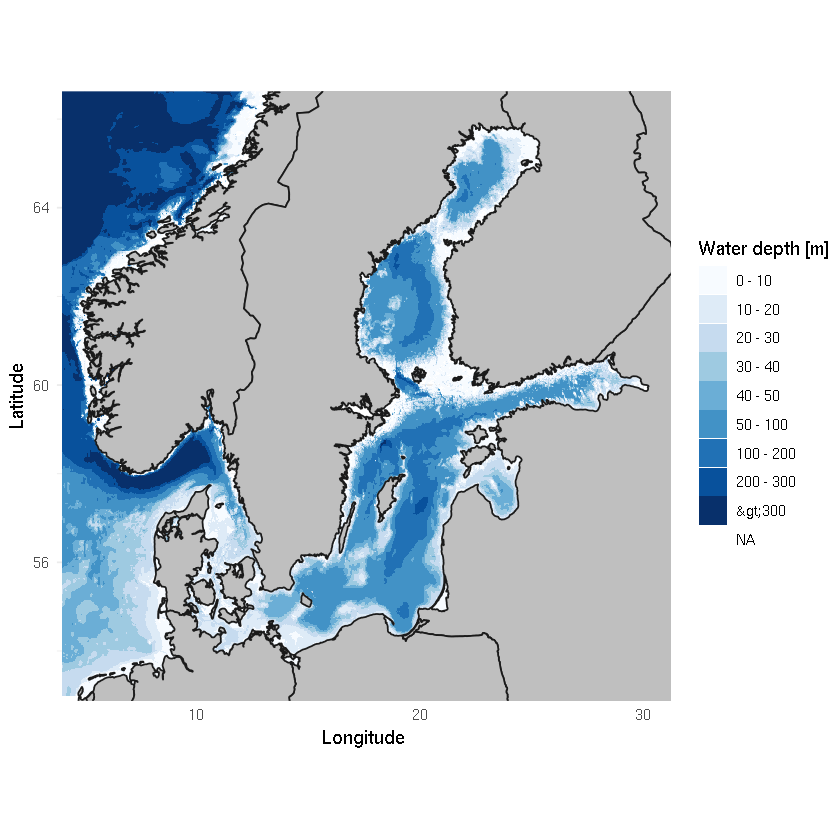

In [5]:
plot.map(bathy = baltic.bathy, basemap = baltic.coastlines, xmin = 5, xmax = 30, ymin = 53.5, ymax = 66)

We can also save it in a png file like this:

In [6]:
# always use a high resolution, e.g. 600 dpi, if you want to use the image for a publication
png(filename = "image.png", width=4000, height=3000, res=600, units="px") 
plot.map(bathy = baltic.bathy, basemap = baltic.coastlines, xmin = 5, xmax = 30, ymin = 53.5, ymax = 66)
dev.off()

png 
  2

Now double-click `image.png` on the left to see the image.